In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

we now define a model that gives probability of a given input belonging to a given class
we will use a temperature scaled sigmoid function for the output and have learnable parameter for the thresholds

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=8)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


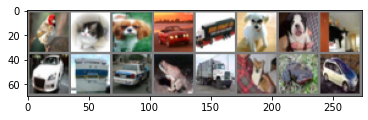

 bird   cat   dog   car truck   dog   dog   cat   car  ship   car  frog truck   dog  frog   car


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class CIFAR10Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cifar10net = CIFAR10Net()

In [5]:
input_image = torch.randn((1,3, 32, 32))
prediction = cifar10net(input_image)
print(prediction)

tensor([[-0.1376,  0.0861,  0.0063, -0.1019,  0.0178,  0.0173, -0.0256,  0.0249,
         -0.0607, -0.0003]], grad_fn=<AddmmBackward0>)


In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cifar10net.parameters(), lr=0.001, momentum=0.9)

In [23]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    running_p_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cifar10net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f'  %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
            running_p_loss = 0.0
            print(torch.mean(torch.abs(cifar10net.conv1.weight.grad)))
        
print('Finished Training')

[1,   200] loss: 1.169
tensor(334.2525)
[1,   400] loss: 1.226
tensor(345.6478)
[1,   600] loss: 1.290
tensor(357.4808)
[1,   800] loss: 1.285
tensor(371.3253)
[1,  1000] loss: 1.190
tensor(381.7988)
[1,  1200] loss: 1.286
tensor(393.9265)
[1,  1400] loss: 1.182
tensor(405.1005)
[1,  1600] loss: 1.235
tensor(416.8531)
[1,  1800] loss: 1.278
tensor(428.8043)
[1,  2000] loss: 1.292
tensor(441.4443)
[1,  2200] loss: 1.219
tensor(453.0085)
[1,  2400] loss: 1.213
tensor(463.4546)
[2,   200] loss: 1.191
tensor(479.0314)
[2,   400] loss: 1.218
tensor(489.2185)
[2,   600] loss: 1.233
tensor(501.3477)
[2,   800] loss: 1.224
tensor(512.3161)
[2,  1000] loss: 1.171
tensor(523.7980)
[2,  1200] loss: 1.310
tensor(537.0596)
[2,  1400] loss: 1.250
tensor(547.2281)
[2,  1600] loss: 1.213
tensor(557.3776)
[2,  1800] loss: 1.283
tensor(570.8448)
[2,  2000] loss: 1.287
tensor(584.1994)
[2,  2200] loss: 1.214
tensor(595.7678)
[2,  2400] loss: 1.197
tensor(608.3007)
Finished Training


In [41]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainset = [trainset[i] for i in range(len(trainset))  if (trainset[i][1] == 0 or trainset[i][1] == 1)]
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testset = [testset[i] for i in range(len(testset))  if (testset[i][1] == 0 or testset[i][1] == 1)]

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=8)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [42]:
print("trainset size and test set size are: ", len(trainset), len(testset))

trainset size and test set size are:  10000 2000


In [56]:
import torch.nn as nn
import torch.nn.functional as F

class BinaryNet(nn.Module):
    def __init__(self, temperature = 0.001):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 1)
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 1)
        self.lamda = nn.Parameter(torch.rand(1))
        self.lamda.requires_grad = True
        self.temperature = temperature

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        x = F.sigmoid(self.temperature * x)
        return x

In [75]:
class PrescisionLoss(nn.Module):
    def __init__(self):
        super().__init__()
        pass
    def forward(self, pred, y):
        tp = torch.sum(y * pred)
        fp = torch.sum((1-y) * pred)
        prescision = torch.mean(tp/(tp + fp + 0.001))
        return -1 * prescision

In [76]:
criterion = nn.CrossEntropyLoss()
prescision = PrescisionLoss()
binarynet = BinaryNet(1)
optimizer = optim.SGD(binarynet.parameters(), lr=100, momentum=0)

In [74]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    running_p_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = binarynet(inputs)
        # loss = criterion(outputs, labels)
        p_loss = prescision(outputs, labels)
        p_loss.backward()
        optimizer.step()

        # print statistics
        running_p_loss += p_loss.item()

        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] and prescision average is %.3f'  %
                  (epoch + 1, i + 1, running_p_loss / 200))
            running_loss = 0.0
            running_p_loss = 0.0
            # print("grad of lamda", binarynet.lamda.grad.item(), "value of lamda", binarynet.lamda.item())
            print(torch.mean(torch.abs(binarynet.conv1.weight.grad)))
print('Finished Training')

[1,   200] and prescision average is 0.719
tensor(1.1096e-07)
[1,   400] and prescision average is 0.706
tensor(9.2958e-08)
[1,   600] and prescision average is 0.745
tensor(5.4513e-08)
[2,   200] and prescision average is 0.732
tensor(3.0218e-08)
[2,   400] and prescision average is 0.718
tensor(2.8258e-08)
[2,   600] and prescision average is 0.728
tensor(1.7133e-08)
[3,   200] and prescision average is 0.718
tensor(1.5373e-08)
[3,   400] and prescision average is 0.723
tensor(9.2667e-09)
[3,   600] and prescision average is 0.741
tensor(1.3428e-08)
[4,   200] and prescision average is 0.712
tensor(8.2618e-09)
[4,   400] and prescision average is 0.722
tensor(8.4730e-09)
[4,   600] and prescision average is 0.751
tensor(1.0537e-08)
[5,   200] and prescision average is 0.694
tensor(6.6751e-09)
[5,   400] and prescision average is 0.746
tensor(6.4475e-09)
[5,   600] and prescision average is 0.755
tensor(6.9169e-09)
[6,   200] and prescision average is 0.732
tensor(9.0998e-09)
[6,   40

KeyboardInterrupt: 